In [2]:
import numpy as np
import matplotlib.pyplot as plt
from problem import qft
import time
%load_ext autoreload
%autoreload 2
num_qubits = 12
num_repeat = 1

import constant
# ---- Benchamrking PSR on Qsun ----
timess = np.zeros((len(constant.packages), num_qubits))
funcs = [qft.qft_Qsun, qft.qft_ProjectQ, qft.qft_Qiskit, qft.qft_Pennylane]
for j, package in enumerate(constant.packages):
    func_name = f"qft_{package}"
    print(func_name)
    for i in range(1, num_qubits + 1):
        times = []
        for _ in range(num_repeat):
            start = time.time()
            prob = funcs[j](num_qubits)
            end = time.time()
            times.append(end-start)
        timess[j][i - 1] = np.mean(times)
print(timess)

qft_Qsun
qft_ProjectQ
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
qft_Qiskit
qft_Pennylane
[[0.13532257 0.13628983 0.13613176 0.13371778 0.13392973 0.13632655
  0.13629007 0.13397622 0.1321218  0.13374138 0.14604664 0.13326979]
 [1.33778119 1.3028686  1.29856372 1.29195547 1.29144597 1.28169179
  1.30472374 1.29651833 1.2871449  1.29293156 1.29076672 1.29643965]
 [0.24083281 0.00599885 0.00550485 0.00600004 0.00500774 0.0065043
  0.00700068 0.00503683 0.00499988 0.00710726 0.00499988 0.00517488]
 [0

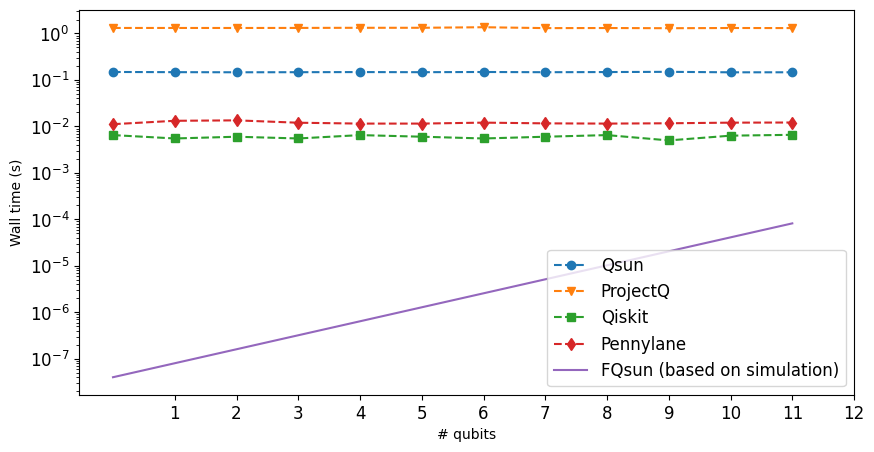

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for j in range(len(timess)):
    plt.plot(timess[j], label=constant.packages[j], marker = constant.markers[j], linestyle =  constant.line_styles[j]) 
times_FQsun = []
for i in range(num_qubits):
    times_FQsun.append(4*(2**i)*(10**(-8)))

plt.plot(times_FQsun, label='FQsun (based on simulation)')

plt.xticks(range(1, num_qubits + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.xlabel('# qubits')
plt.legend(fontsize=12)
plt.ylabel('Wall time (s)')
plt.show()
# plt.savefig('compare_time_QCD_projectq.png')